In [1]:
# importing labratories
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
# importing data
df = pd.read_csv(
    "dft-road-casualty-statistics-casualty-provisional-mid-year-unvalidated-2022 (1).csv"
)

In [3]:
df.head()

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,Unvalidated,2022070151244,2022,070151244,2,1,1,2,46,8,3,0,0,0,0,0,9,1,9,E01033378
1,Unvalidated,2022070152668,2022,070152668,1,1,1,1,30,6,3,0,0,0,0,0,9,1,2,E01018551
2,Unvalidated,2022070154696,2022,070154696,1,1,1,2,58,9,3,0,0,0,0,0,9,1,10,E01006134
3,Unvalidated,2022070154696,2022,070154696,2,3,1,2,78,11,3,0,0,0,0,0,9,2,10,E01018724
4,Unvalidated,2022070154696,2022,070154696,3,2,1,1,63,9,3,0,0,0,0,0,9,3,7,W01000578


In [4]:
print(df.isnull().sum())
# Example: df.dropna(inplace=True)

status                                0
accident_index                        0
accident_year                         0
accident_reference                    0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
lsoa_of_casualty                      0
dtype: int64


In [5]:
#droping unneeded data
#accident_year	+accident_reference=accident_index
df.drop('status', axis=1, inplace=True)#status is the same for all data
df.drop('accident_year', axis=1, inplace=True)#accident_year is the same for all data
df.drop('accident_index', axis=1, inplace=True)#accident_index  has the same pattern as accident_reference
df.head()

,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,070151244,2,1,1,2,46,8,3,0,0,0,0,0,9,1,9,E01033378
1,070152668,1,1,1,1,30,6,3,0,0,0,0,0,9,1,2,E01018551
2,070154696,1,1,1,2,58,9,3,0,0,0,0,0,9,1,10,E01006134
3,070154696,2,3,1,2,78,11,3,0,0,0,0,0,9,2,10,E01018724
4,070154696,3,2,1,1,63,9,3,0,0,0,0,0,9,3,7,W01000578


In [6]:
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)


Duplicate Rows:
Empty DataFrame
Columns: [accident_reference, vehicle_reference, casualty_reference, casualty_class, sex_of_casualty, age_of_casualty, age_band_of_casualty, casualty_severity, pedestrian_location, pedestrian_movement, car_passenger, bus_or_coach_passenger, pedestrian_road_maintenance_worker, casualty_type, casualty_home_area_type, casualty_imd_decile, lsoa_of_casualty]
Index: []


In [7]:
#checking all category with dataframe guild
df['vehicle_reference'].value_counts()#is ok

vehicle_reference
1      36255
2      23337
3       1427
4        227
5         71
6         19
7          7
8          4
9          3
227        1
61         1
Name: count, dtype: int64

In [8]:
#checking all category with dataframe guild
df['casualty_reference'].value_counts()#is ok

casualty_reference
1      47792
2       9305
3       2795
4        934
5        325
6        100
7         37
8         15
9         11
10        10
11         7
12         6
14         4
13         4
15         3
16         2
22         1
148        1
Name: count, dtype: int64

In [9]:
#checking all category with dataframe guild
df['casualty_class'].value_counts()#is ok

casualty_class
1    40702
2    11710
3     8940
Name: count, dtype: int64

In [10]:
#checking all category with dataframe guild
df['sex_of_casualty'].value_counts()#is not ok[1 male 2 female -1 Data missing or out of range 9 unknown] we will remove data with value -1 or 9
df.drop(df[(df['sex_of_casualty'] == -1) | (df['sex_of_casualty'] == 9)].index, inplace=True)

In [11]:
df['age_of_casualty'].value_counts()#is not ok

age_of_casualty
18     1595
19     1517
21     1427
20     1400
22     1383
       ... 
96        4
99        4
97        3
98        2
101       1
Name: count, Length: 102, dtype: int64

In [12]:
df[df['age_of_casualty']<0]#-1 :Data missing or out of range,no information about age has found
df.drop(df[(df['age_of_casualty'] == -1) & (df['age_band_of_casualty'] == -1)].index, inplace=True)


In [13]:
df['casualty_severity'].value_counts()#is ok

casualty_severity
3    47414
2    11625
1      787
Name: count, dtype: int64

In [14]:
df['pedestrian_location'].value_counts()#is ok

pedestrian_location
0     51087
5      3285
1      1446
6      1024
9       930
10      817
8       563
4       540
7        62
2        40
3        32
Name: count, dtype: int64

In [15]:
df['pedestrian_movement'].value_counts()#is ok

pedestrian_movement
0    51086
1     2803
9     2457
3     1761
5      474
2      423
4      318
7      224
8      222
6       58
Name: count, dtype: int64

In [16]:
df['car_passenger'].value_counts()#is  not ok removing data with value -1 and 9
df.drop(df[(df['car_passenger'] == -1) | (df['car_passenger'] == 9)].index, inplace=True)

In [17]:
df['bus_or_coach_passenger'].value_counts()#is  not ok removing data with value -1 and 9
df.drop(df[(df['bus_or_coach_passenger'] == -1) | (df['bus_or_coach_passenger'] == 9)].index, inplace=True)

In [18]:
df['pedestrian_road_maintenance_worker'].value_counts()#is  not ok removing data with value -1 
df.drop(df[(df['pedestrian_road_maintenance_worker'] == -1) ].index, inplace=True)

In [19]:
df['casualty_type'].value_counts()#is  not ok removing data with value -1 and 99
df.drop(df[(df['casualty_type'] == -1) | (df['casualty_type'] == 99)].index, inplace=True)

In [20]:
df['casualty_home_area_type'].value_counts()#is  not ok removing data with value -1
df.drop(df[(df['casualty_home_area_type'] == -1) ].index, inplace=True)

In [21]:
df['casualty_imd_decile'].value_counts()#is  not ok removing data with value -1
df.drop(df[(df['casualty_imd_decile'] == -1) ].index, inplace=True)

In [22]:
df.head()

,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,070151244,2,1,1,2,46,8,3,0,0,0,0,0,9,1,9,E01033378
1,070152668,1,1,1,1,30,6,3,0,0,0,0,0,9,1,2,E01018551
2,070154696,1,1,1,2,58,9,3,0,0,0,0,0,9,1,10,E01006134
3,070154696,2,3,1,2,78,11,3,0,0,0,0,0,9,2,10,E01018724
4,070154696,3,2,1,1,63,9,3,0,0,0,0,0,9,3,7,W01000578


In [23]:
df['lsoa_of_casualty'].value_counts()#geometrical data,removing data with value -1
df.drop(df[(df['lsoa_of_casualty'] == -1)| (df['lsoa_of_casualty'] == '-1' )].index, inplace=True)

In [24]:
df['accident_reference'].value_counts()

accident_reference
010377133    16
471142394    13
411164580    12
211187319    10
351164705    10
             ..
131135306     1
131135489     1
131135502     1
131136435     1
461157316     1
Name: count, Length: 42124, dtype: int64

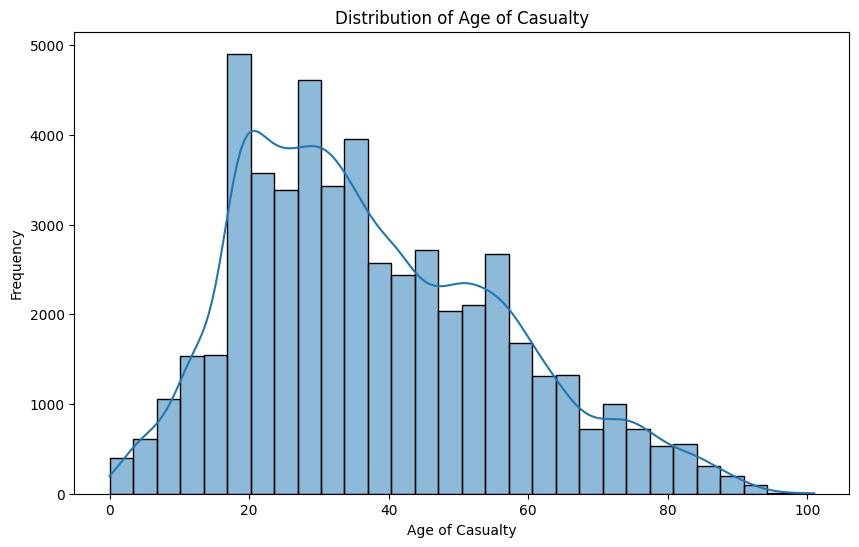

In [25]:
# Example: Histogram for age_of_casualty
plt.figure(figsize=(10, 6))
sns.histplot(df['age_of_casualty'], bins=30, kde=True)
plt.title('Distribution of Age of Casualty')
plt.xlabel('Age of Casualty')
plt.ylabel('Frequency')
plt.show()

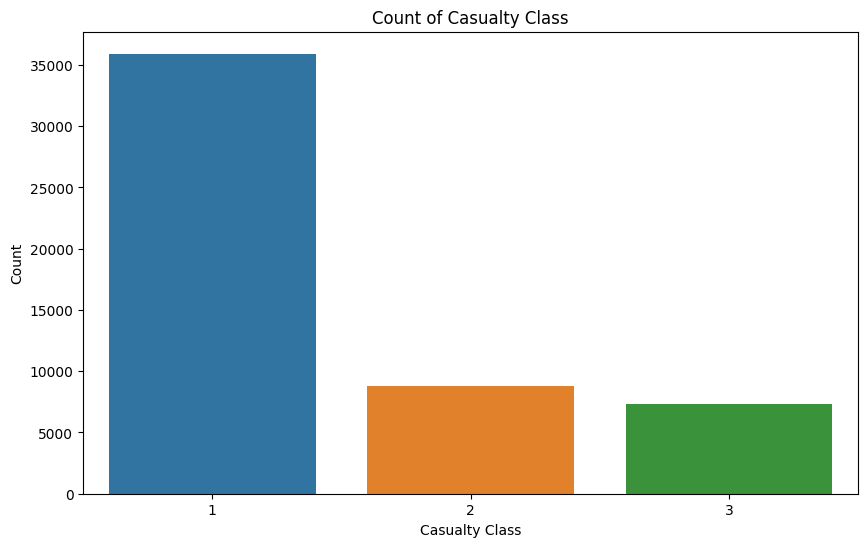

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='casualty_class', data=df)
plt.title('Count of Casualty Class')
plt.xlabel('Casualty Class')
plt.ylabel('Count')
plt.show()

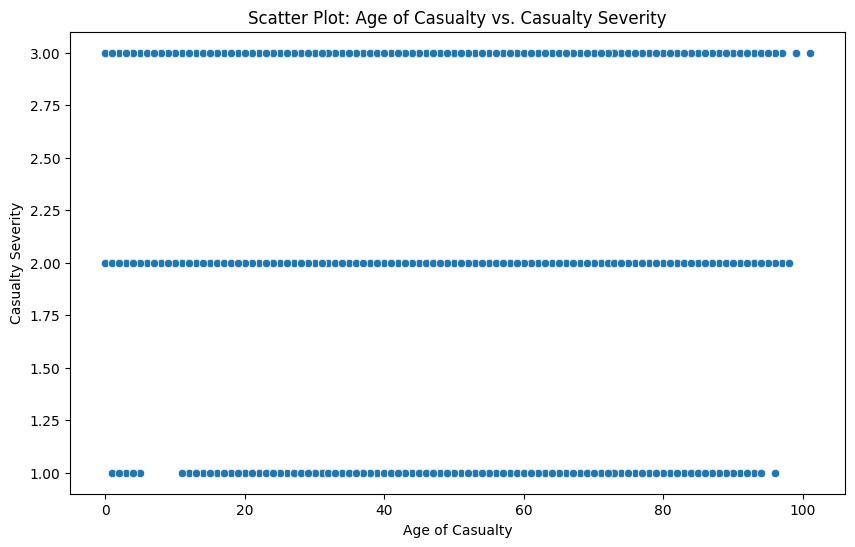

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age_of_casualty', y='casualty_severity', data=df)
plt.title('Scatter Plot: Age of Casualty vs. Casualty Severity')
plt.xlabel('Age of Casualty')
plt.ylabel('Casualty Severity')
plt.show()

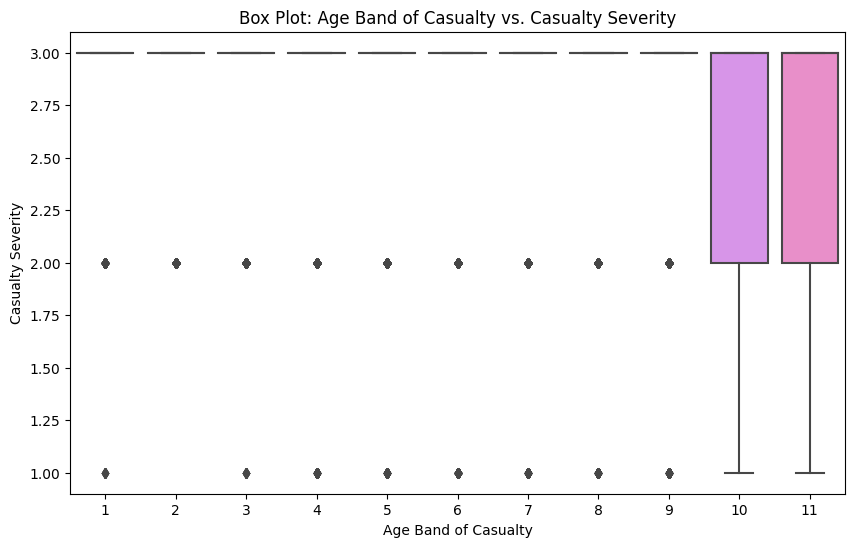

In [28]:
# Example: Box plot for age_band_of_casualty
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_band_of_casualty', y='casualty_severity', data=df)
plt.title('Box Plot: Age Band of Casualty vs. Casualty Severity')
plt.xlabel('Age Band of Casualty')
plt.ylabel('Casualty Severity')
plt.show()


c:\Users\axe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


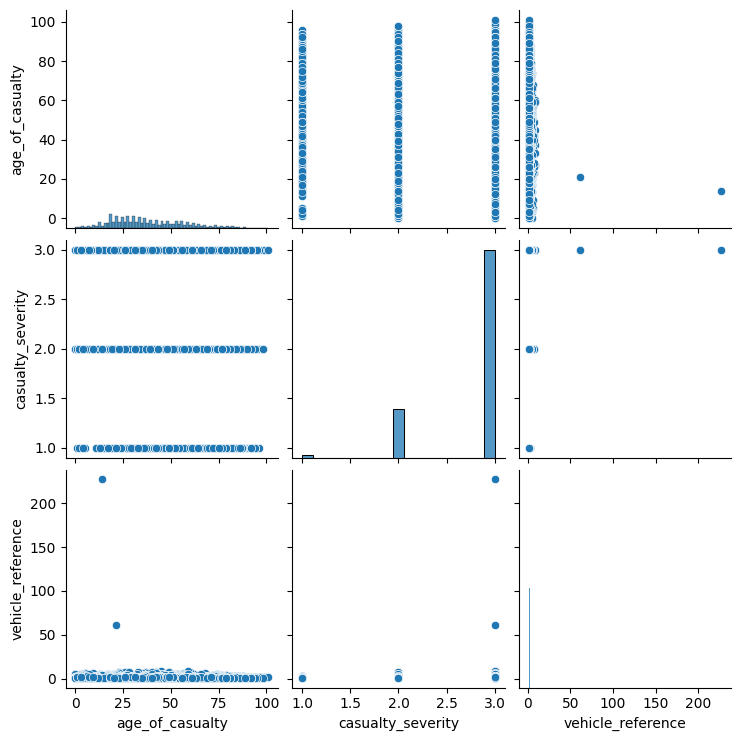

In [29]:
# Example: Pair plot for selected numerical variables
sns.pairplot(df[['age_of_casualty', 'casualty_severity', 'vehicle_reference']])
plt.show()


In [30]:

# # Assuming 'df' is the name of your DataFrame
# # Create subplots
# fig, axes = plt.subplots(nrows=len(df.columns) // 3 + 1, ncols=3, figsize=(15, 2 * len(df.columns) // 3 + 1))
# fig.tight_layout(pad=3.0)

# # Loop through columns and create histograms
# for i, column in enumerate(df.columns):
#     ax = axes[i // 3, i % 3] if len(df.columns) > 3 else axes[i]
#     sns.histplot(df[column], ax=ax, bins=20)
#     ax.set_title(f'Histogram of {column}')
#     ax.set_xlabel(column)
#     ax.set_ylabel('Frequency')

# # Show the plots
# plt.show()
df.drop('accident_reference', axis=1, inplace=True)

In [31]:
# Create new columns 'country' and 'location_code' based on 'lsoa_of_casualty'
df['country'] = df['lsoa_of_casualty'].str[0]  # Extract the first character (W or E)
df['location_code'] = df['lsoa_of_casualty'].str[1:]  # Extract the remaining characters
# Replace 'E' with 1 and 'W' with 0 in the 'country' column
df['country'] = df['country'].replace({'E': 1, 'W': 0})
df.drop('lsoa_of_casualty', axis=1, inplace=True)

In [32]:
#Creating a regression model
# Select features (excluding the target variable)
features = df.drop(['casualty_severity',], axis=1)

# Select the target variable
target = df['casualty_severity']


In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [34]:
# Create a list of models to evaluate
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('Support Vector Machine', SVR()),
    ('Neural Network', MLPRegressor())
]

In [35]:
# Evaluate each model and store the results
results = []
for name, model in models:
    # Create a pipeline for models that require scaling
    if 'Regressor' in model.__class__.__name__:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('model', model)
        ])
    else:
        pipeline = Pipeline([
            ('model', model)
        ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test set
    predictions = pipeline.predict(X_test)
    
    # Calculate mean squared error
    mse = mean_squared_error(y_test, predictions)
    
    results.append({'Model': name, 'MSE': mse})


In [36]:
# Display the results
results_df = pd.DataFrame(results)
print(results_df)

                    Model       MSE
0       Linear Regression  0.185124
1           Decision Tree  0.350827
2           Random Forest  0.192658
3       Gradient Boosting  0.175452
4  Support Vector Machine  0.201458
5          Neural Network  0.185240


In [37]:
# Select the model with the lowest MSE
best_model = results_df.loc[results_df['MSE'].idxmin()]['Model']
print(f'The best model is: {best_model}')

The best model is: Gradient Boosting
